# Which factors affect Airbnb Seattle Pricing ?

___

## 1. Introduction:
### In this notebook we will use CRISP-DM methodology to explore and analyise Airbnb Seattle Dataset. Several methodologies and techniques will be used to demonstrate the findings including data wrangling and different data visualization techniques. We use CRISP-DM (Cross-Industry Standard Process for Data Mining) which is an industry-proven methodology for data mining which was proposed by IBM. CRISP-DM cosnsists of the following steps:

* Business Understanding
* Data Understanding
* Data Preparation
* Data Modeling
* Evaluation 
* Deployment

____

## 2. Business Understanding: 

### Airbnb is the world leader in lodging industry with a turnover of USD 2.6B (2017). Airbnb is privately held and it serves the world from San Fransisco, California. Its crusial for such a service to understand why customers tend to select one host over the other, is it because of the area, the facilities and services, or other factors. Also, its. essential to understand how can to setup the cost and which features or factors are essential to dictate the cost.
### In this report we will study and analyze Airbnb Seattle Dataset to answer the following questions:

* Whom are the top 15 hosts in Seattle?

* Which are the top 15 booked neighbourhoods ?

* What are the top factors affecting the price?

* What is the average of the accomodations based on the prvious factors?


### To be able to answer the questions, we will be needing to get a dataset. We have used kaggle to get the Seattle Dataset




___

## 3. Data Understanding
### In this step we will import the ncessary python libraries, loading the datasets, viewing, checking the shape of the datasets, data types, missing and null values and answer the basic questions 

In [582]:
# Import the ncessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import plot
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [583]:
# Import the data

listings=pd.read_csv('listings.csv')
listings_num=pd.read_csv('listings.csv')
reviews=pd.read_csv('reviews.csv')
calendar=pd.read_csv('calendar.csv')


In [584]:
# Checking the head and tail of listings table
listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                

In [585]:
listings.tail()

id                            listing_url       scrape_id  \
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                name  \
3813   2016-01-04  3BR Mountain View House in Seattle   
3814   2016-01-04   Portage Bay View!-One Bedroom Apt   
3815   2016-01-04   Private apartment view of Lake WA   
3816   2016-01-04   Amazing View with Modern Comfort!   
3817   2016-01-04           Large Lakefront Apartment   

                                                summary  \
3813  Our 3BR/2BA house boasts incredible views of t...   
3814  800 square foot 1 bedroom basement apartment w...   
3815  Very comfortable lower unit. Quiet, charming m...   
3816  Cozy studio condo in the heart on Madison Park...   
3817  All hardwood floors, fireplace, 65" TV with Xb...   

                                                  space  \
3813  Our 3BR/2BA house bright, stylish, and wheelch...   
3814  This space has a great view of Portage Bay wit...   
3815                                                NaN   
3816  Fully furnished unit to accommodate most needs...   
3817                                                NaN   

                                            description experiences_offered  \
3813  Our 3BR/2BA house boasts incredible views of t...                none   
3814  800 square foot 1 bedroom basement apartment w...                none   
3815  Very comfortable lower unit. Quiet, charming m...                none   
3816  Cozy studio condo in the heart on Madison Park...                none   
3817  All hardwood floors, fireplace, 65" TV with Xb...                none   

                                  neighborhood_overview  \
3813  We're located near lots of family fun. Woodlan...   
3814  The neighborhood is a quiet oasis that is clos...   
3815                                                NaN   
3816  Madison Park offers a peaceful slow pace upsca...   
3817                                                NaN   

                                                  notes  \
3813                                                NaN   
3814  This is a basement apartment in a newer reside...   
3815                                                NaN   
3816                                                NaN   
3817               Also our puppy will be boarded away.   

                                                transit  \
3813                                                NaN   
3814  Uber and Car2go are good options in Seattle. T...   
3815                                                NaN   
3816                                                Yes   
3817                                                NaN   

                                          thumbnail_url  \
3813  https://a2.muscache.com/ac/pictures/103217071/...   
3814  https://a2.muscache.com/ac/pictures/626d4b1f-6...   
3815  https://a2.muscache.com/ac/pictures/a5974f04-2...   
3816  https://a2.muscache.com/ac/pictures/202e4ad6-b...   
3817  https://a2.muscache.com/ac/pictures/596705b3-0...   

                                             medium_url  \
3813  https://a2.muscache.com/im/pictures/103217071/...   
3814  https://a2.muscache.com/im/pictures/626d4b1f-6...   
3815  https://a2.muscache.com/im/pictures/a5974f04-2...   
3816  https://a2.muscache.com/im/pictures/202e4ad6-b...   
3817  https://a2.muscache.com/im/pictures/596705b3-0...   

                                            picture_url  \
3813  https://a2.muscache.com/ac/pictures/103217071/...   
3814  https://a2.muscache.com/ac/pictures/626d4b1f-6...   
3815  https://a2.muscache.com/ac/pictures/a5974f04-2...   
3816  https://a2.muscache.com/ac/p

In [586]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### For the listings dataset, we have 3,818 records/rows and 92 features/columns. With regards to the data types. We can see that there are 17 float columns, 13 int columns and 62 object columns. We can notice some empty null and missing values based on the number of records.

In [587]:
# Checking the head and tail of reviews table
reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [588]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


###  For the reviews dataset, there are 84,849 records/rows and 6 fatures/columns. There are 3 integer columns and 3 object columns. There are also missing values in the comments feature.

In [589]:
# Checking the head and tail of calendar table
calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [590]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


### For the calendar dataset, thre are 1,393,570 records/rows and 4 features/columns. There 1 integer and 3 object columns. There are missing values in the price column.

In [591]:
# Review the data with describtive statistics for the listings 
listings.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  -122.417219      1.000000   
25%                     1.000000    47.609418  -122.354320      2.000000   
50%                     1.000000    47.623601  -122.328874      3.000000   
75%                     3.000000    47.662694  -122.310800      4.000000   
max                   502.000000    47.733358  -122.240607     16.000000   

         bathrooms     bedrooms         beds  square_feet  guests_included  \
count  3802.000000  3812.000000  3817.000000    97.000000      3818.000000   
mean      1.259469     1.307712     1.735394   854.618557         1.672603   
std       0.590369     0.883395     1.139480   671.404893         1.311040   
min       0.000000     0.000000     1.000000     0.000000         0.000000   
25%       1.000000     1.000000     1.000000   420.000000         1.000000   
50%       1.000000     1.000000     1.000000   750.000000         1.000000   
75%       1.000000     2.000000     2.000000  1200.000000         2.000000   
max       8.000000     7.000000    15.000000  3000.000000        15.000000   

       minimum_nights  maximum_nights  availability_30  availability_60  \
count     3818.000000     3818.000000      3818.000000      3818.000000   
mean         2.369303      780.447617        16.786276        36.814825   
std         16.305902     1683.589007        12.173637        23.337541   
min          1.000000        1.000000         0.000000         0.000000   
25%          1.000000       60.000000         2.000000        13.000000   
50%          2.000000     1125.000000        20.000000        46.000000   
75%          2.000000     1125.000000        30.000000        59.000000   
max       1000.000000   100000.000000        30.000000        60.000000   

       availability_90  availability_365  number_of_reviews  \
count      3818.000000       3818.000000        3818.000000   
mean         58.082504        244.772656          22.223415   
std          34.063845        126.772526          37.730892   
min           0.000000          0.000000           0.000000   
25%          28.000000        124.000000           2.000000   
50%          73.000000        308.000000           9.000000   
75%          89.000000        360.000000          26.000000   
max          90.000000        365.000000         474.000000   

       review_scores_rating  review_scores_accuracy  \
count           3171.000000             3160.000000   
mean              94.539262                9.636392   
std                6.606083                0.698031   
min               20.000000                2.000000   
25%               93.000000                9.000000   
50%               96.000000               10.000000   
75%               99.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                3165.000000            3160.000000   
mean                    9.556398               9.786709   
std                     0.797274               0.595499   
min 

In [592]:
reviews.describe()

listing_id            id   reviewer_id
count  8.484900e+04  8.484900e+04  8.484900e+04
mean   3.005067e+06  3.058765e+07  1.701301e+07
std    2.472877e+06  1.636613e+07  1.353704e+07
min    4.291000e+03  3.721000e+03  1.500000e+01
25%    7.946330e+05  1.725127e+07  5.053141e+06
50%    2.488228e+06  3.228809e+07  1.413476e+07
75%    4.694479e+06  4.457648e+07  2.762402e+07
max    1.024814e+07  5.873651e+07  5.281274e+07

In [593]:
calendar.describe()

listing_id
count  1.393570e+06
mean   5.550111e+06
std    2.962274e+06
min    3.335000e+03
25%    3.258213e+06
50%    6.118244e+06
75%    8.035212e+06
max    1.034016e+07

### From the above we can see that there are a lot of data inconsistency from data type prospective and will require cleaning and wrangling in terms of missing and nan values and replicated columns

___

## 4. Data Preparation: 
### In this step, the ncessary data is gathered to answer our questions. Replicated and uncessary columns are dropped. Missing and nan values are fixed. Categorial and other data types are handled. 



### We will use only listing table that reflect the required information on our questions

In [594]:
# Checking the % of the null values in every column of the listings dataset
(listings.isnull().sum()/len(listings)*100).sort_values(ascending=False)

license                             100.000000
square_feet                          97.459403
monthly_price                        60.267156
security_deposit                     51.126244
weekly_price                         47.380828
notes                                42.063908
neighborhood_overview                27.029859
cleaning_fee                         26.977475
transit                              24.463070
host_about                           22.498690
host_acceptance_rate                 20.246202
review_scores_accuracy               17.234154
review_scores_checkin                17.234154
review_scores_value                  17.181771
review_scores_location               17.155579
review_scores_cleanliness            17.103195
review_scores_communication          17.050812
review_scores_rating                 16.946045
reviews_per_month                    16.422211
first_review                         16.422211
last_review                          16.422211
space        

### From the above we can see that the top 11 columns have  > 20% missing values

In [595]:
# Checking the % of the null values in every column of the calendar dataset
(calendar.isnull().sum()/len(calendar)*100).sort_values(ascending=False)

price         32.938998
available      0.000000
date           0.000000
listing_id     0.000000
dtype: float64

In [596]:
# Checking the % of the null values in every column > 20%
# (listings.isnull().sum()/len(listings)*100).sort_values(ascending=False) >20

### Dropping the columns with > 20% missing values for both calendar and listings datasets

In [597]:
# dropping the columns where missing values > 20%
listings = listings.drop(columns=['neighborhood_overview', 'cleaning_fee', 'transit', 'host_about', 'host_acceptance_rate', 'license', 'square_feet', 'monthly_price', 'security_deposit', 'weekly_price', 'notes'], axis =1)

In [598]:
# dropping the columns where missing values > 20%
calendar = calendar.drop(columns=['price'], axis =1)

In [599]:
# Checking the columns with missing values again in listings dataset
(listings.isnull().sum()/len(listings)*100).sort_values(ascending=False)

review_scores_accuracy              17.234154
review_scores_checkin               17.234154
review_scores_value                 17.181771
review_scores_location              17.155579
review_scores_cleanliness           17.103195
review_scores_communication         17.050812
review_scores_rating                16.946045
first_review                        16.422211
last_review                         16.422211
reviews_per_month                   16.422211
space                               14.903091
host_response_rate                  13.698271
host_response_time                  13.698271
neighbourhood                       10.895757
thumbnail_url                        8.381351
medium_url                           8.381351
xl_picture_url                       8.381351
host_neighbourhood                   7.857517
summary                              4.635935
bathrooms                            0.419068
host_location                        0.209534
zipcode                           

In [600]:
# Checking the columns with missing values again in calendar dataset
(calendar.isnull().sum()/len(calendar)*100).sort_values(ascending=False)

available     0.0
date          0.0
listing_id    0.0
dtype: float64

### Checking the missing values

In [601]:
listings.isnull().sum().sum()

9984

In [602]:
calendar.isnull().sum().sum()

0

### Replacing missing values with 0 in the listings and calendar datasets

In [603]:
listings.replace(np.nan, 0, inplace=True)

In [604]:
calendar.replace(np.nan, 0, inplace=True)

### Checking the NaN values again

In [605]:
listings.isnull().sum()

id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
summary                             0
space                               0
description                         0
experiences_offered                 0
thumbnail_url                       0
medium_url                          0
picture_url                         0
xl_picture_url                      0
host_id                             0
host_url                            0
host_name                           0
host_since                          0
host_location                       0
host_response_time                  0
host_response_rate                  0
host_is_superhost                   0
host_thumbnail_url                  0
host_picture_url                    0
host_neighbourhood                  0
host_listings_count                 0
host_total_listings_count           0
host_verific

In [606]:
calendar.isnull().sum()

listing_id    0
date          0
available     0
dtype: int64

In [607]:
listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                  0   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                  0   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                                       thumbnail_url  \
0                                                  0   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                  0   
3                                                  0   
4                                                  0   

                                          medium_url  \
0                                                  0   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                  0   
3                                                  0   
4                                                  0   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                  0    956883   
1  https://a0.muscache.com/ac/pictures/14409893/f...   5177328   
2                                                  0  16708587   
3                                                  0   9851441   
4                                                  0   1452570   

                                     host_url host_name  host_since  \
0    https://www.airbnb.com/users/show/956883     Maija  2011-08-11   
1   https://www.airbnb.com/users/show/5177328    Andrea  2013-02-21   
2  https://www.airbnb.com/users/show/16708587      Jill  2014-06-12   
3   https://www.airbnb.com/users/show/9851441     Emily  2013-11-06   
4   https://www.airbnb.com/users/show/1452570     Emily  2011-11-29   

                        host_location  host_response_time host_response_rate  \
0  Seattle, Washington, United States  within a few hours                96%   
1  Seattle, Washington, United States      within an hour                98%   
2  Seattle, Washington, United States  within a few hours     

### Dropping unessary or repliaceted columns

In [608]:
# dropping the uncessary and replicated columns.  
listings = listings.drop(columns=['host_name', 'calendar_updated', 'host_since', 'host_response_time', 'host_listings_count', 'neighbourhood_group_cleansed', 'zipcode', 'latitude', 'longitude', 'is_location_exact', 'has_availability', 'requires_license', 'country', 'city', 'state', 'street', 'market', 'smart_location', 'country_code', 'summary', 'description', 'space',  'jurisdiction_names', 'scrape_id', 'last_scraped', 'host_picture_url', 'host_verifications',  'listing_url', 'experiences_offered', 'thumbnail_url',  'medium_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'xl_picture_url', 'calendar_last_scraped', 'neighbourhood', 'host_neighbourhood', 'first_review', 'last_review', 'name', 'host_location'], axis =1)

In [609]:
listings.head()

id   host_id host_response_rate host_is_superhost  \
0   241032    956883                96%                 f   
1   953595   5177328                98%                 t   
2  3308979  16708587                67%                 f   
3  7421966   9851441                  0                 f   
4   278830   1452570               100%                 f   

   host_total_listings_count host_has_profile_pic host_identity_verified  \
0                        3.0                    t                      t   
1                        6.0                    t                      t   
2                        2.0                    t                      t   
3                        1.0                    t                      t   
4                        2.0                    t                      t   

  neighbourhood_cleansed property_type        room_type  accommodates  \
0        West Queen Anne     Apartment  Entire home/apt             4   
1        West Queen Anne     Apartment  Entire home/apt             4   
2        West Queen Anne         House  Entire home/apt            11   
3        West Queen Anne     Apartment  Entire home/apt             3   
4        West Queen Anne         House  Entire home/apt             6   

   bathrooms  bedrooms  beds  bed_type  \
0        1.0       1.0   1.0  Real Bed   
1        1.0       1.0   1.0  Real Bed   
2        4.5       5.0   7.0  Real Bed   
3        1.0       0.0   2.0  Real Bed   
4        2.0       3.0   3.0  Real Bed   

                                           amenities    price  \
0  {TV,"Cable TV",Internet,"Wireless Internet","A...   $85.00   
1  {TV,Internet,"Wireless Internet",Kitchen,"Free...  $150.00   
2  {TV,"Cable TV",Internet,"Wireless Internet","A...  $975.00   
3  {Internet,"Wireless Internet",Kitchen,"Indoor ...  $100.00   
4  {TV,"Cable TV",Internet,"Wireless Internet",Ki...  $450.00   

   guests_included extra_people  minimum_nights  maximum_nights  \
0                2        $5.00               1             365   
1                1        $0.00               2              90   
2               10       $25.00               4              30   
3                1        $0.00               1            1125   
4                6       $15.00               1            1125   

   availability_30  availability_60  availability_90  availability_365  \
0               14               41               71               346   
1               13               13               16               291   
2                1                6               17               220   
3                0                0                0               143   
4               30               60               90               365   

   number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                207                  95.0                    10.0   
1                 43                  96.0                    10.0   
2                 20                  97.0                    10.0   
3                  0                   0.0                     0.0   
4                 38                  92.0                     9.0   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                       10.0                   10.0   
2                       10.0                   10.0   
3                        0.0                    0.0   
4                        9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                     9.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                          0.0                     0.0                  0.0   
4                         10.0                     9.0                  9.0   

  instant_bookable cancell

In [610]:
listings.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   host_id                           3818 non-null   int64  
 2   host_response_rate                3818 non-null   object 
 3   host_is_superhost                 3818 non-null   object 
 4   host_total_listings_count         3818 non-null   float64
 5   host_has_profile_pic              3818 non-null   object 
 6   host_identity_verified            3818 non-null   object 
 7   neighbourhood_cleansed            3818 non-null   object 
 8   property_type                     3818 non-null   object 
 9   room_type                         3818 non-null   object 
 10  accommodates                      3818 non-null   int64  
 11  bathrooms                         3818 non-null   float64
 12  bedroo

### We need to to clean the prices columns by taking out the $ symbol and converting the column from object to float

In [611]:
listings['price'] = listings.price.str.strip('$')

In [612]:
listings['extra_people'] = listings.extra_people.str.strip('$')

In [613]:
listings['price'] = pd.to_numeric(listings['price'],errors='coerce')

In [614]:
listings['extra_people'] = pd.to_numeric(listings['extra_people'],errors='coerce')

### converting host_since from object to datetime datatype

In [615]:
calendar['date'] = pd.to_datetime(calendar['date'])

### We need to to clean the columns with % by taking out the % symbol and converting the column from object to float

In [616]:
listings['host_response_rate'] = listings.host_response_rate.str.strip('%')

In [617]:
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'],errors='coerce')

In [618]:
listings.dtypes

id                                    int64
host_id                               int64
host_response_rate                  float64
host_is_superhost                    object
host_total_listings_count           float64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
price                               float64
guests_included                       int64
extra_people                        float64
minimum_nights                        int64
maximum_nights                        int64
availability_30                       int64
availability_60                 

### Converting the categorial varilables to numeric

In [619]:
listings_num = listings.copy()

In [620]:
listings_num['host_identity_verified'] = listings_num['host_identity_verified'].astype('category').cat.codes

In [621]:
listings_num['host_is_superhost'] = listings_num['host_is_superhost'].astype('category').cat.codes

In [622]:
listings_num['host_has_profile_pic'] = listings_num['host_has_profile_pic'].astype('category').cat.codes

In [623]:
listings_num['property_type'] = listings_num['property_type'].astype('category').cat.codes

In [624]:
listings_num['room_type'] = listings_num['room_type'].astype('category').cat.codes

In [625]:
listings_num['bed_type'] = listings_num['bed_type'].astype('category').cat.codes

In [626]:
listings_num['amenities'] = listings_num['amenities'].astype('category').cat.codes

In [627]:
listings_num['instant_bookable'] = listings_num['instant_bookable'].astype('category').cat.codes

In [628]:
listings_num['cancellation_policy'] = listings_num['cancellation_policy'].astype('category').cat.codes

In [629]:
listings_num['require_guest_profile_picture'] = listings_num['require_guest_profile_picture'].astype('category').cat.codes

In [630]:
listings_num['require_guest_phone_verification'] = listings_num['require_guest_phone_verification'].astype('category').cat.codes

In [631]:
listings_num['id'] = listings_num['id'].astype('category').cat.codes

In [632]:
listings_num['host_id'] = listings_num['host_id'].astype('category').cat.codes

In [664]:
listings_num['neighbourhood_cleansed'] = listings_num['neighbourhood_cleansed'].astype('category').cat.codes

In [665]:
listings_num.head()

id  host_id  host_response_rate  host_is_superhost  \
0   127      229                96.0                  1   
1   374      753                98.0                  2   
2   977     1534                67.0                  1   
3  2512     1162                 NaN                  1   
4   142      319               100.0                  1   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        3.0                     2                       2   
1                        6.0                     2                       2   
2                        2.0                     2                       2   
3                        1.0                     2                       2   
4                        2.0                     2                       2   

   neighbourhood_cleansed  property_type  room_type  accommodates  bathrooms  \
0                      81              1          0             4        1.0   
1                      81              1          0             4        1.0   
2                      81             10          0            11        4.5   
3                      81              1          0             3        1.0   
4                      81             10          0             6        2.0   

   bedrooms  beds  bed_type  amenities  price  guests_included  extra_people  \
0       1.0   1.0         4       1467   85.0                2           5.0   
1       1.0   1.0         4       2729  150.0                1           0.0   
2       5.0   7.0         4       1350  975.0               10          25.0   
3       0.0   2.0         4        864  100.0                1           0.0   
4       3.0   3.0         4       2060  450.0                6          15.0   

   minimum_nights  maximum_nights  availability_30  availability_60  \
0               1             365               14               41   
1               2              90               13               13   
2               4              30                1                6   
3               1            1125                0                0   
4               1            1125               30               60   

   availability_90  availability_365  number_of_reviews  review_scores_rating  \
0               71               346                207                  95.0   
1               16               291                 43                  96.0   
2               17               220                 20                  97.0   
3                0               143                  0                   0.0   
4               90               365                 38                  92.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                    10.0                       10.0                   10.0   
2                    10.0                       10.0                   10.0   
3                     0.0                        0.0                    0.0   
4                     9.0                        9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                     9.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                          0.0                     0.0                  0.0   
4                         10.0                     9.0                  9.0   

   instant_bookable  cancellation_policy  require_guest_profile_picture  \
0                 0                    1                              0   
1                 0                    2                              1   
2                 0                    2                              0   
3                 0                    0               

Finding out if there is host name duplicates

## 5. Data Modeling:

In [634]:
# listings_dummy.head()

In [635]:
# listings_dummy = pd.get_dummies(listings, drop_first=True)

In [636]:
# dups_shape = listings.pivot_table(index=['host_id'], aggfunc='size')

In [637]:
# dups_shape.index

In [666]:
listings_num.corr()

id   host_id  host_response_rate  \
id                                1.000000  0.526779           -0.023486   
host_id                           0.526779  1.000000           -0.017555   
host_response_rate               -0.023486 -0.017555            1.000000   
host_is_superhost                -0.179286 -0.091425            0.153810   
host_total_listings_count        -0.017558 -0.074499            0.022147   
host_has_profile_pic             -0.031746 -0.021404           -0.000372   
host_identity_verified           -0.165083 -0.232388            0.090387   
neighbourhood_cleansed           -0.000194  0.007764           -0.031925   
property_type                    -0.044046 -0.043996            0.044479   
room_type                         0.012270  0.036661           -0.010282   
accommodates                     -0.072106 -0.107626            0.005433   
bathrooms                        -0.045030 -0.043565            0.005279   
bedrooms                         -0.057565 -0.079650           -0.001040   
beds                             -0.048582 -0.075468            0.015617   
bed_type                         -0.015800 -0.037162            0.037637   
amenities                         0.089404  0.062870            0.007689   
price                            -0.051899 -0.050778           -0.014071   
guests_included                  -0.099935 -0.082703            0.065056   
extra_people                     -0.088781 -0.033159            0.019094   
minimum_nights                   -0.023612 -0.022948            0.006604   
maximum_nights                    0.096889  0.061492           -0.082118   
availability_30                  -0.063821 -0.040036           -0.047150   
availability_60                  -0.072278 -0.044780           -0.035688   
availability_90                  -0.084045 -0.047325           -0.031227   
availability_365                 -0.159727 -0.089550           -0.087838   
number_of_reviews                -0.491456 -0.264044            0.104779   
review_scores_rating             -0.419528 -0.170898            0.097171   
review_scores_accuracy           -0.422457 -0.171969            0.090600   
review_scores_cleanliness        -0.413166 -0.166864            0.102826   
review_scores_checkin            -0.431296 -0.176127            0.090744   
review_scores_communication      -0.427130 -0.172379            0.093257   
review_scores_location           -0.415672 -0.166775            0.080213   
review_scores_value              -0.413519 -0.163151            0.096658   
instant_bookable                  0.042352  0.082946            0.094017   
cancellation_policy              -0.277061 -0.245062            0.092686   
require_guest_profile_picture    -0.215819 -0.299143            0.015841   
require_guest_phone_verification -0.256966 -0.334560            0.002301   
calculated_host_listings_count   -0.054340 -0.212590           -0.087481   
reviews_per_month                -0.119738  0.027363            0.168230   

                                  host_is_superhost  \
id                                        -0.179286   
host_id                                   -0.091425   
host_response_rate                         0.153810   
host_is_superhost                          1.000000   
host_total_listings_count                 -0.039775   
host_has_profile_pic                       0.054250   
host_identity_verified                     0.151422   
neighbourhood_cleansed                    -0.005766   
property_type                              0.033836   
room_type                                 -0.015971   
accommodates                              -0.002012   
bathrooms                                  0.001362   
bedrooms                                  -0.026557   
beds                                      -0.022382   
bed_type                                   0.028015   
amenities                                  0.032379   
price                                      0.012868   
guests_in

In [689]:
tophost=listings.host_id.value_counts().head(15)
tophost

8534462     46
4962900     39
1243056     37
430709      36
3074414     34
74305       33
26967583    21
7354306     18
42537846    16
1623580     12
658155      12
2911360     11
862329      11
754810      10
31148752    10
Name: host_id, dtype: int64

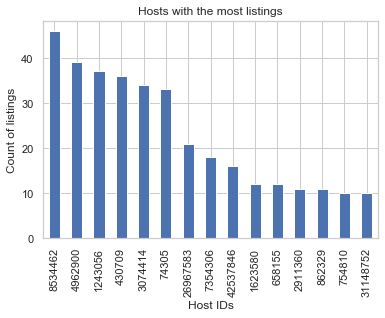

In [690]:
p1=tophost.plot(kind='bar')
p1.set_title('Hosts with the most listings')
p1.set_ylabel('Count of listings')
p1.set_xlabel('Host IDs')
p1.set_xticklabels(p1.get_xticklabels(), rotation=90);

In [670]:
topprice=listings.price.max()
topprice

999.0

In [671]:
top_neighbourhood_cleansed=listings.neighbourhood_cleansed.value_counts().head(15)
top_neighbourhood_cleansed

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Name: neighbourhood_cleansed, dtype: int64

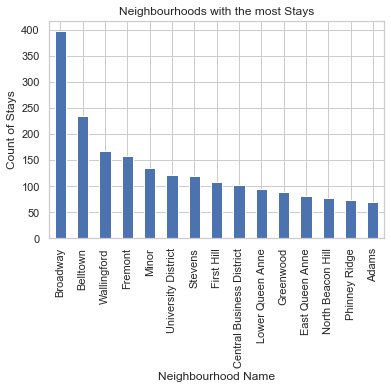

In [691]:
p2=top_neighbourhood_cleansed.plot(kind='bar')
p2.set_title('Neighbourhoods with the most Stays')
p2.set_ylabel('Count of Stays')
p2.set_xlabel('Neighbourhood Name')
p2.set_xticklabels(p2.get_xticklabels(), rotation=90);

In [673]:
listings_num.columns

Index(['id', 'host_id', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [674]:
listings_num.head()

id  host_id  host_response_rate  host_is_superhost  \
0   127      229                96.0                  1   
1   374      753                98.0                  2   
2   977     1534                67.0                  1   
3  2512     1162                 NaN                  1   
4   142      319               100.0                  1   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        3.0                     2                       2   
1                        6.0                     2                       2   
2                        2.0                     2                       2   
3                        1.0                     2                       2   
4                        2.0                     2                       2   

   neighbourhood_cleansed  property_type  room_type  accommodates  bathrooms  \
0                      81              1          0             4        1.0   
1                      81              1          0             4        1.0   
2                      81             10          0            11        4.5   
3                      81              1          0             3        1.0   
4                      81             10          0             6        2.0   

   bedrooms  beds  bed_type  amenities  price  guests_included  extra_people  \
0       1.0   1.0         4       1467   85.0                2           5.0   
1       1.0   1.0         4       2729  150.0                1           0.0   
2       5.0   7.0         4       1350  975.0               10          25.0   
3       0.0   2.0         4        864  100.0                1           0.0   
4       3.0   3.0         4       2060  450.0                6          15.0   

   minimum_nights  maximum_nights  availability_30  availability_60  \
0               1             365               14               41   
1               2              90               13               13   
2               4              30                1                6   
3               1            1125                0                0   
4               1            1125               30               60   

   availability_90  availability_365  number_of_reviews  review_scores_rating  \
0               71               346                207                  95.0   
1               16               291                 43                  96.0   
2               17               220                 20                  97.0   
3                0               143                  0                   0.0   
4               90               365                 38                  92.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                    10.0                       10.0                   10.0   
2                    10.0                       10.0                   10.0   
3                     0.0                        0.0                    0.0   
4                     9.0                        9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                     9.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                          0.0                     0.0                  0.0   
4                         10.0                     9.0                  9.0   

   instant_bookable  cancellation_policy  require_guest_profile_picture  \
0                 0                    1                              0   
1                 0                    2                              1   
2                 0                    2                              0   
3                 0                    0               

### Using the numerical values of the categories to check which. factors are affecting the price

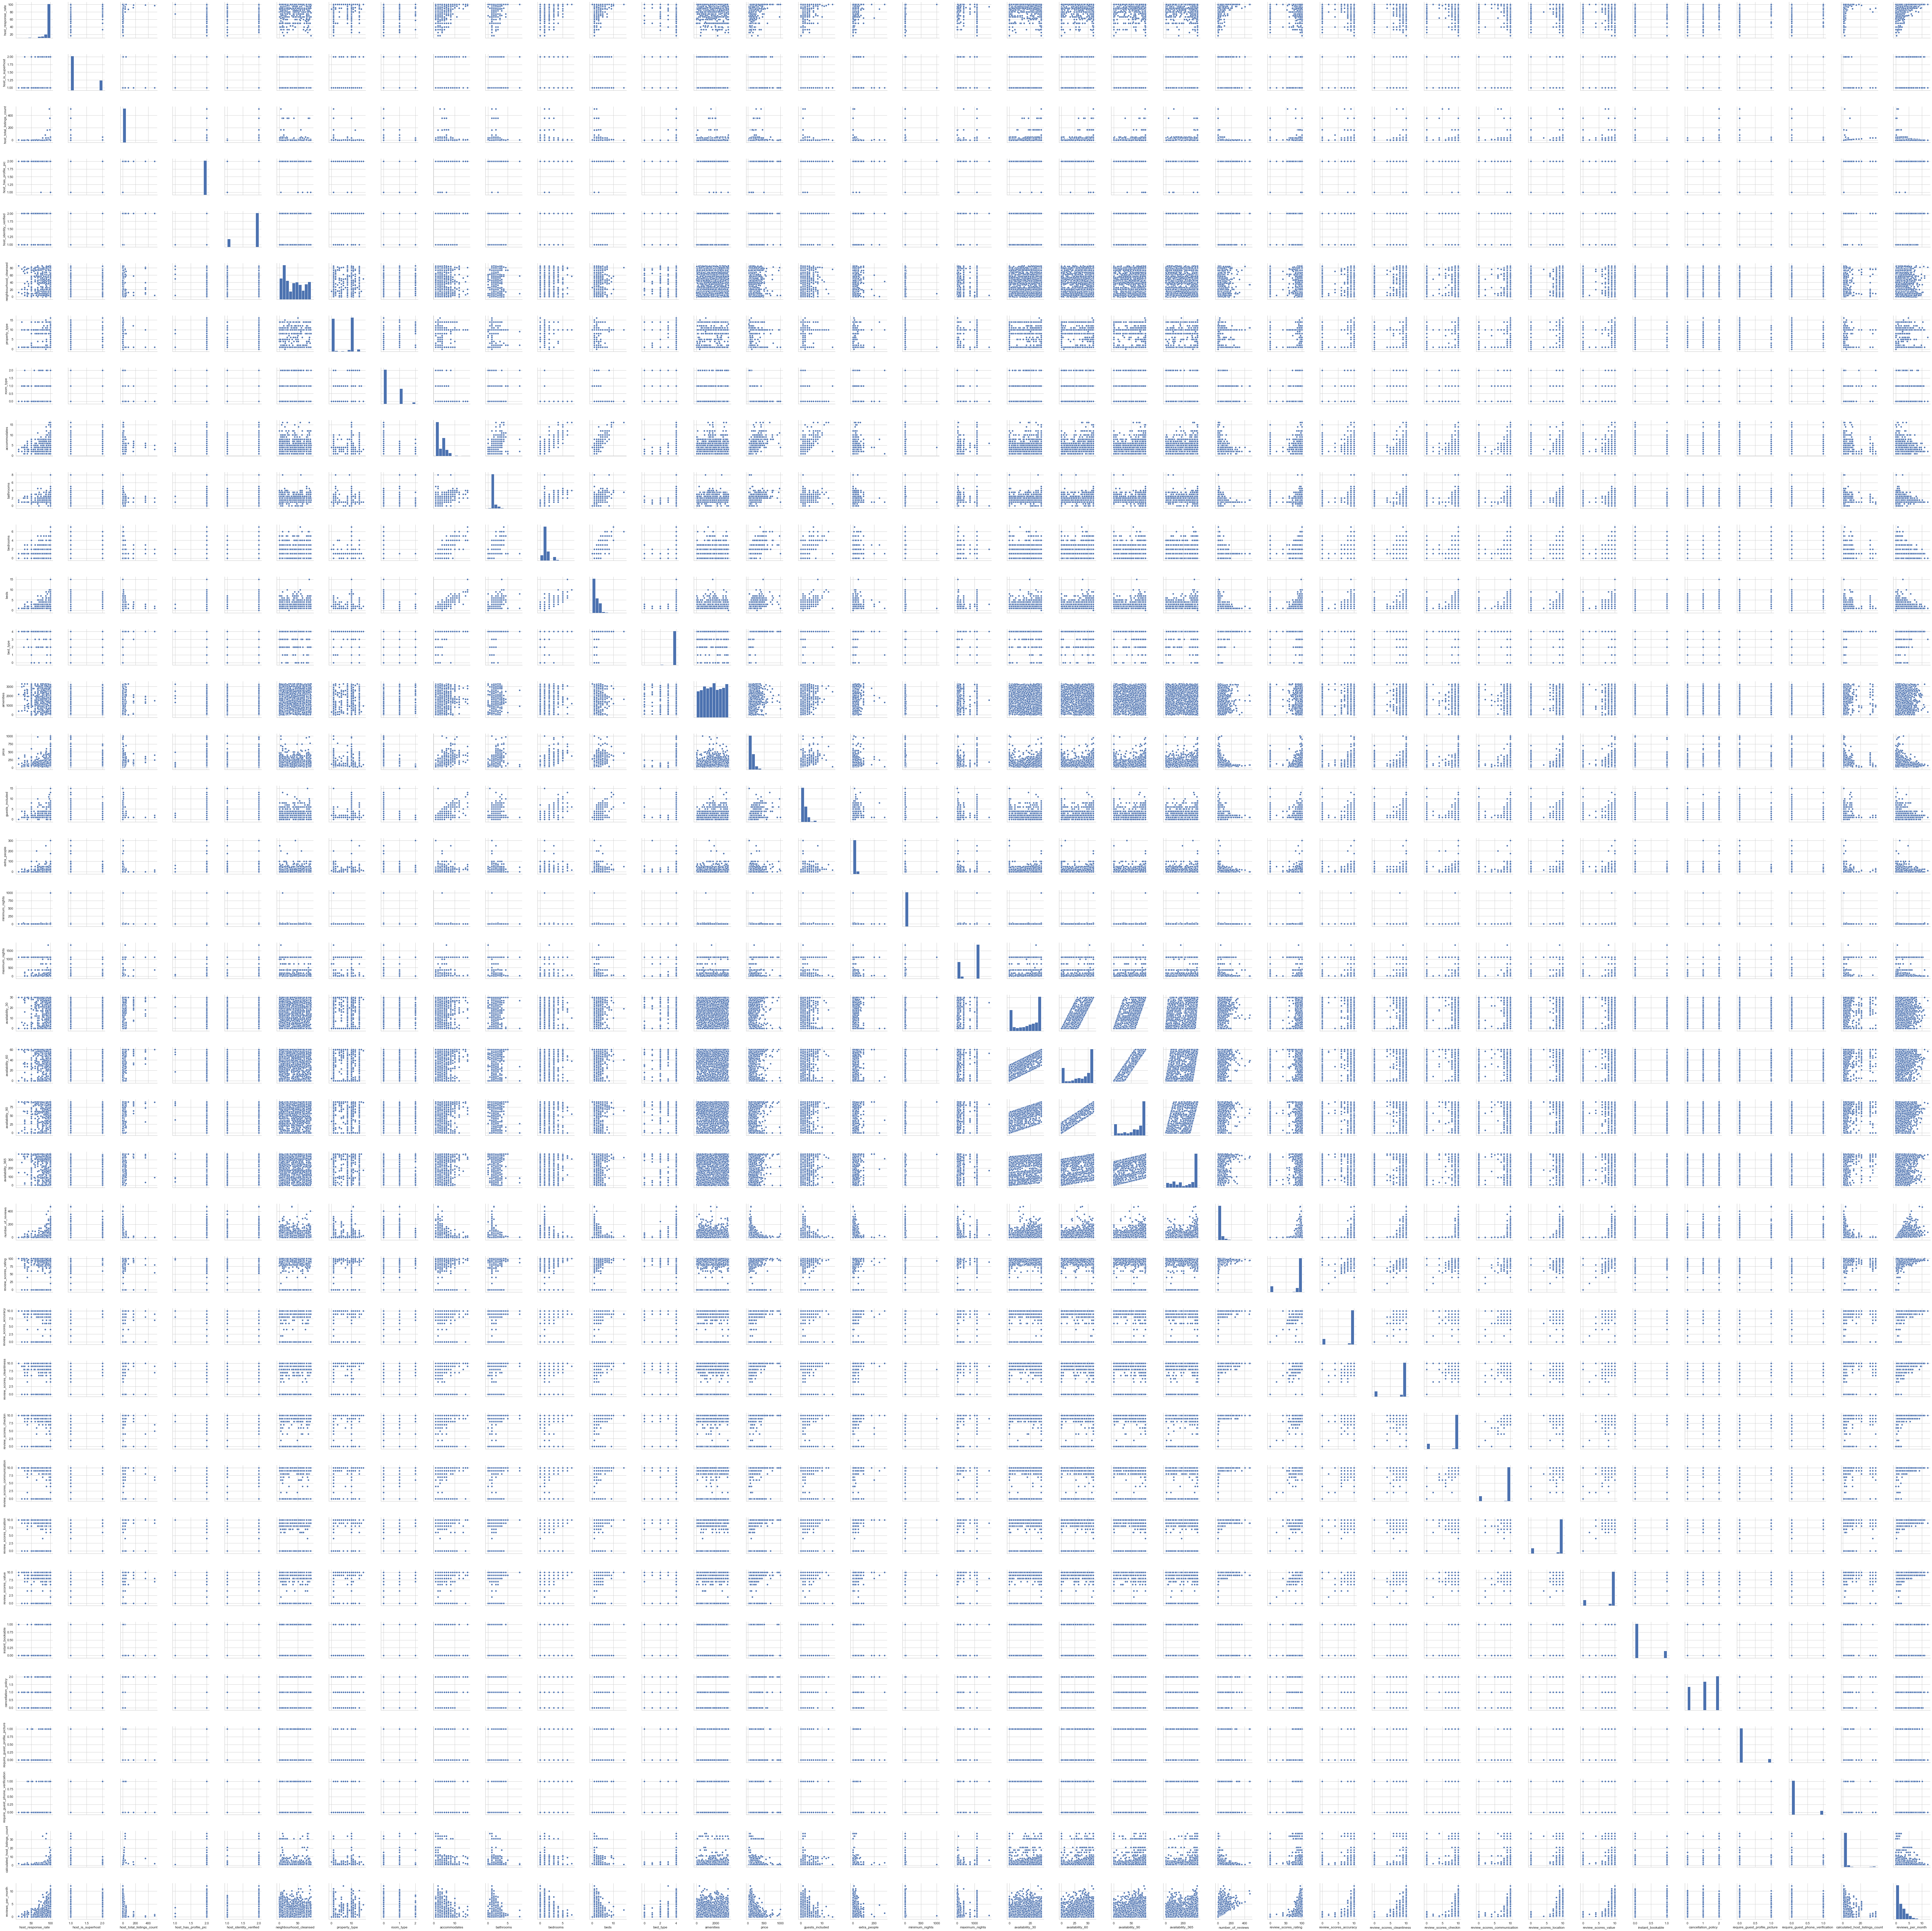

In [676]:
col = ['host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month']
sns.set(style="whitegrid", color_codes=True)
sns.pairplot(listings_num.loc[(listings_num.price > 0)][col].dropna())
plt.show();

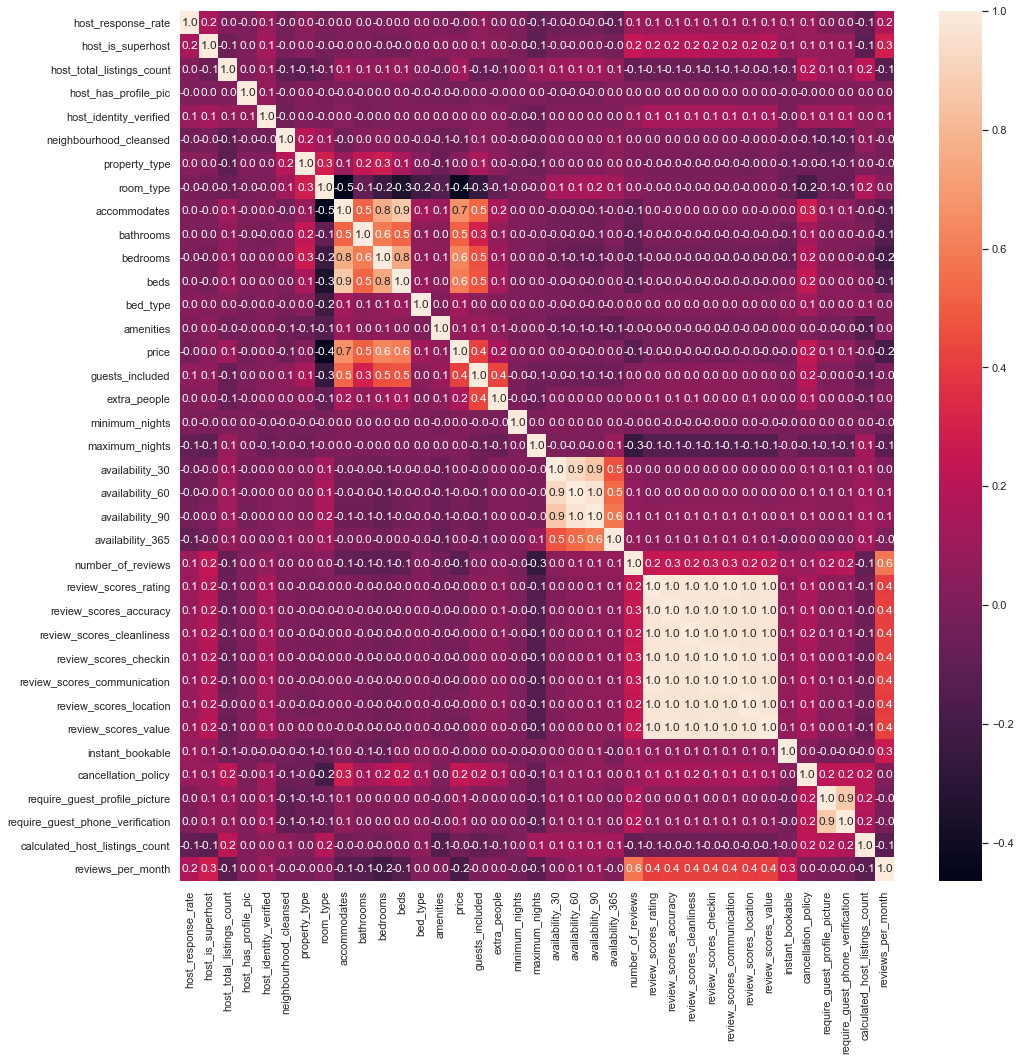

In [675]:
corr = listings_num.loc[(listings_num.price > 0)][col].dropna().corr()
plt.figure(figsize = (16,16))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, fmt = '.1f', xticklabels=col, yticklabels=col)
plt.show();

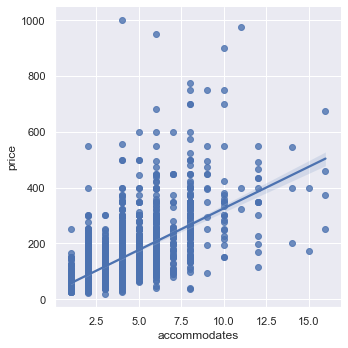

In [650]:
# line graphs linear regression plot price vs accommodates
sns.lmplot(x='accommodates', y="price", data=listings)

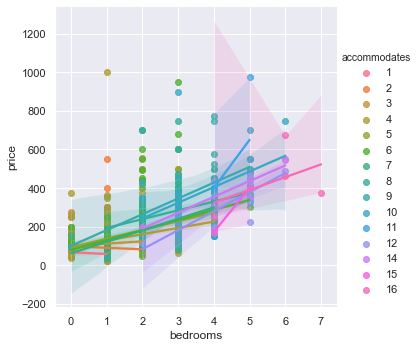

In [651]:
# line graphs linear regression plot price vs bedrooms
sns.lmplot(x='bedrooms', y="price", data=listings, hue='accommodates')

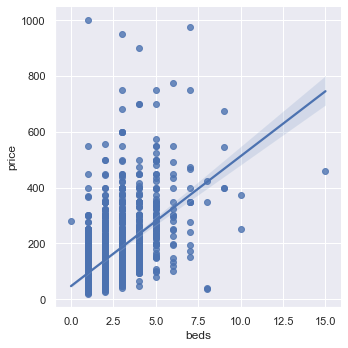

In [652]:
# line graphs linear regression plot price vs beds
sns.lmplot(x='beds', y="price", data=listings)

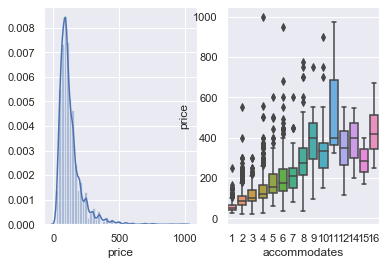

In [656]:
# using subplot with pltmatlib 1 x 2
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(listings.price, ax=ax1)
sns.boxplot(x='accommodates', y='price', data=listings, ax=ax2)

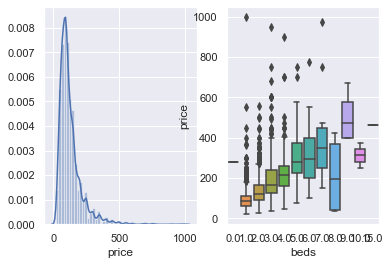

In [657]:
# using subplot with pltmatlib 1 x 2
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(listings.price, ax=ax1)
sns.boxplot(x='beds', y='price', data=listings, ax=ax2)

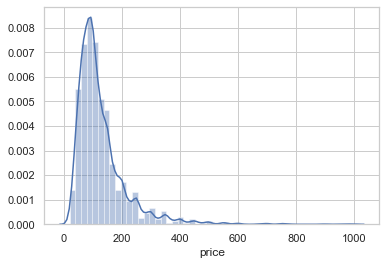

In [685]:
# disttibution and histogram
sns.distplot(listings.price)

## 6. Conclusion and Observation

We found out that the price mainly affected the following factors using the correlation hotmap
1. Number of poeple the listing can accomodates
2. Number of bedrooms
3. NUmber of beds

We noticed that the price increase is propotinal to the number of people it accomodates and/or number of bedrooms and beds. 